# Fréquence d'assignation taxonomique en fonction de la base de référence

Dans cette partie, nous déterminons le fréquence à laquelle chaque base de référence à fait une assignation taxonomique jusqu'au rang du genre et de l'espèce.

## Préparation de l'environnement et des données
### Chargement des librairies nécessaires

In [1]:
# collection de packages pour la manipulation de données
library(tidyverse) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Importation des données
Les données utilisées dans cette partie correspondent aux données se trouvant dans le tableau construit dans le jupyter notebook [2.Preparation_data.ipynb](2.Preparation_data.ipynb). 

In [2]:
# Importation du tableau de donnée final
df_pm4 <- tibble(read.csv("data/output/data_final_pm4.csv", sep = ";"))

## Détermination du pourcentage d'assignation 

In [3]:
# Création d'un dataframe contenant les pourcentages d'assignation au genre et à l'espèce
pctg_assign <- df_pm4 |> 
    # Regrouper par base de référence et par température
    group_by(base_ref, temperature) |>
    # Filtrer pour ne garder que les ASV distincts pour éviter des comptages multiples lorsqu'un ASV a été 
    # présent chez plusieurs individus pour le couple température * base de référence
    distinct(ASV, .keep_all = TRUE) |> 
    # La fonction summarise permet de ne conserver que les nouvelels variables crées et les variables de 
    # regroupement
    summarise(
            # Nombre d'ASV distincts pour chaque couple température * base de référence
            n_ASV = n(),
            # Pourcentage d'ASV sur le nombre d'ASV distincts qui ont eu une assignation taxonomique peu importe le niveau taxonomique
            assign_tot = round(sum(!is.na(Species) | !is.na(Genus) | !is.na(Family) | !is.na(Order) | !is.na(Class) | !is.na(Phylum) | !is.na(Kingdom))/n_ASV*100,2),
            # Pourcentage d'ASV qui ont eu une assignation taxonomique à minima au niveau du genre
            assign_g = round(sum(!is.na(Genus))/n_ASV*100,2),
            # Pourcentage d'ASV qui ont eu une assignation taxonomique jusqu'au niveau de l'espèce
            assign_s = round(sum(!is.na(Species))/n_ASV*100,2))

# Affichage du dataframe crée
pctg_assign

`summarise()` has grouped output by 'base_ref'. You can override using the
`.groups` argument.


base_ref,temperature,n_ASV,assign_tot,assign_g,assign_s
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
GG2,15,721,100,70.04,42.02
GG2,20,1200,100,68.75,40.00
GG2,25,1189,100,69.05,42.05
RDP,15,721,100,66.99,49.93
RDP,20,1200,100,64.00,47.58
RDP,25,1189,100,63.08,45.84
SILVA,15,721,100,68.38,22.61
SILVA,20,1200,100,64.50,18.25
SILVA,25,1189,100,63.33,17.41


## Représentation graphique

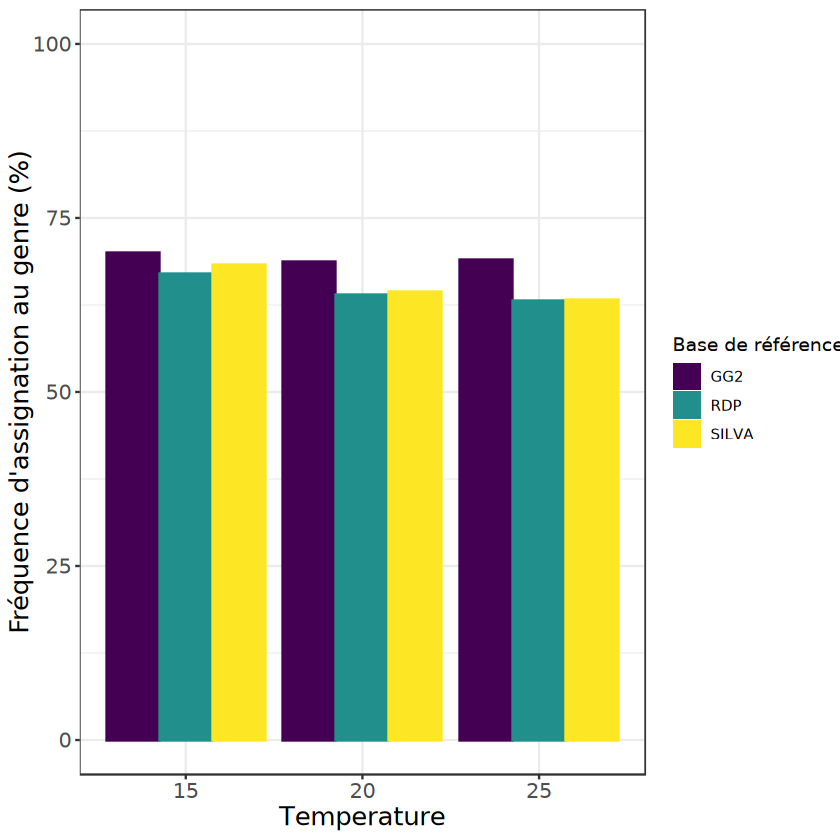

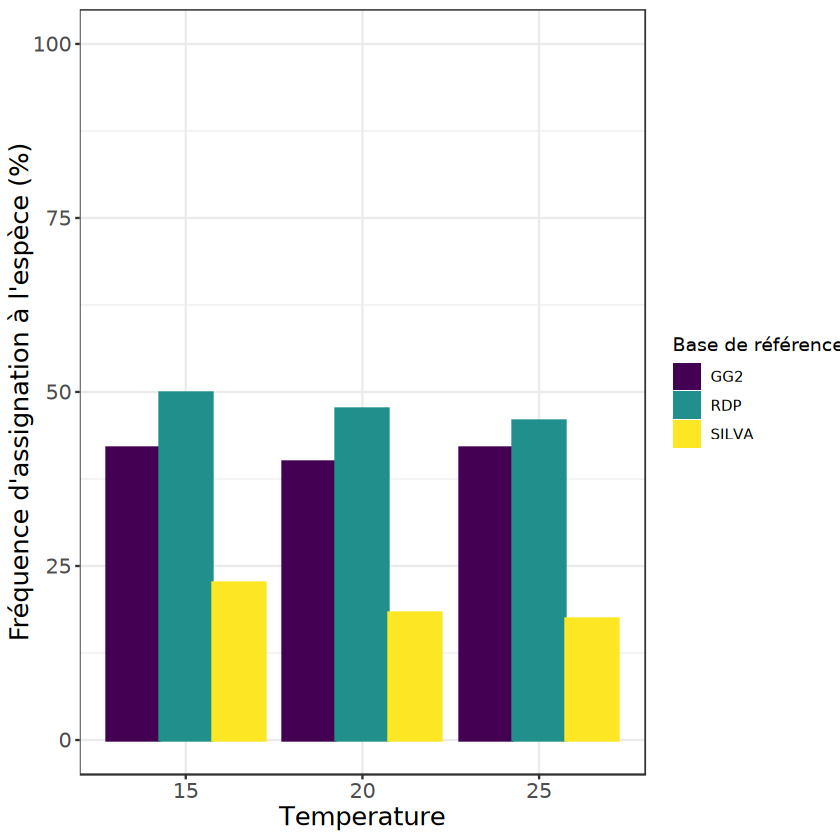

In [4]:
# Barplot pour la fréquence d'assignation au genre
assign_gs_plot <- ggplot(pctg_assign, aes(x = factor(temperature), y = assign_g, fill = base_ref, colour = base_ref)) +
    geom_bar(stat = "identity", position = "dodge") + 
    labs(x = "Temperature", y = "Fréquence d'assignation au genre (%)", fill = "Base de référence") +
    guides(colour = "none") + 
    ylim(0,100) + 
    scale_fill_viridis_d() +
    scale_colour_viridis_d() + 
    theme_bw() + 
    theme(axis.title = element_text(size = 15),
         axis.text = element_text(size = 12))

# Affichage  du graphique obtenu
assign_gs_plot

# Sauvegarde du graphique obtenu dans le dossier dans le dossier "figures"
ggsave("data/output/figures/freq_assign_gs.png", assign_gs_plot, width = 6, height = 5)

# Barplot pour la fréquence d'assignation à l'espèce
assign_sp_plot <- ggplot(pctg_assign, aes(x = factor(temperature), y = assign_s, fill = base_ref, colour = base_ref)) +
    geom_bar(stat = "identity", position = "dodge") + 
    labs(x = "Temperature", y = "Fréquence d'assignation à l'espèce (%)", fill = "Base de référence") +
    guides(colour = "none") + 
    ylim(0,100) + 
    scale_fill_viridis_d() +
    scale_colour_viridis_d() + 
    theme_bw() + 
    theme(axis.title = element_text(size = 15),
         axis.text = element_text(size = 12))

# Affichage  du graphique obtenu
assign_sp_plot

# Sauvegarde du graphique obtenu dans le dossier dans le dossier "figures"
ggsave("data/output/figures/freq_assign_sp.png", assign_sp_plot, width = 6, height = 5)

Concernant la fréquence d'assignation au genre : 
- Elle semble légèrement plus élevée pour GG2 que SILVA et RDP pour toutes les températures ; cet écart semble plus marqué pour 20°C et 25°C.
- Elle semble être sensiblement la même pour toutes les températures avec une très faible diminution qui semble se dessiner. 

Concernant la fréquence d'assignation à l'espèce : 
- Elle est plus faible qu'au genre pour toutes les bases de données
- La base de référence SILVA présente environ 2 fois moins d'assignations que RDP et GG2
- RDP est la base qui assigne plus fréquemment jusqu'à l'espèce
- A part pour GG2, le nombre d'assignations au genre semble diminuer avec une élévation de température